# Tasks for laboratory assignment 1

In [10]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [11]:
def parse_web_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.content, 'html.parser')
        text = soup.get_text(separator=' ', strip=True)
        
        return text
    except requests.exceptions.RequestException as e:
        return f"Error fetching the URL: {e}"

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [12]:
def parse_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status() 
        
        data = response.json()  
        
        with open('result.json', 'w') as file:
            json.dump(data, file, indent=4) 
        
        print("Data saved to result.json.")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the API: {e}")

parse_api('https://api.github.com/')

Data saved to result.json.


## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [13]:
def parse_json(date):
    try:
        with open('resources/weather.json', 'r') as file:
            data = json.load(file)  

        if 'daily' in data:
            weather_data = [
                record for record in data['daily'] if record.get('date') == date
            ]
            return weather_data
        else:
            print("No 'daily' data found in the file.")
            return []

    except FileNotFoundError:
        print("The file weather.json does not exist.")
        return []
    except json.JSONDecodeError:
        print("Error decoding JSON from weather.json.")
        return []
    
target_date = '2024-08-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [14]:
def parse_csv(date):
    weather_data = []
    try:
        with open('resources/weather.csv', mode='r') as file:
            reader = csv.DictReader(file) 
            
            for row in reader:
                if row['CET'] == date:
                    weather_data.append([value for value in row.values()])

        return weather_data

    except FileNotFoundError:
        print("The file weather.csv does not exist.")
        return []
    except Exception as e:
        print(f"Error: {e}")
        return []

    
target_date = '1997-5-22'
print(parse_csv(target_date))

[['1997-5-22', '25', '18', '10', '11', '8', '6', '88', '54', '34', '1017', '1015', '1012', '10', '10', '10', '11', '3', '', '0.00', '3', '', '277']]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

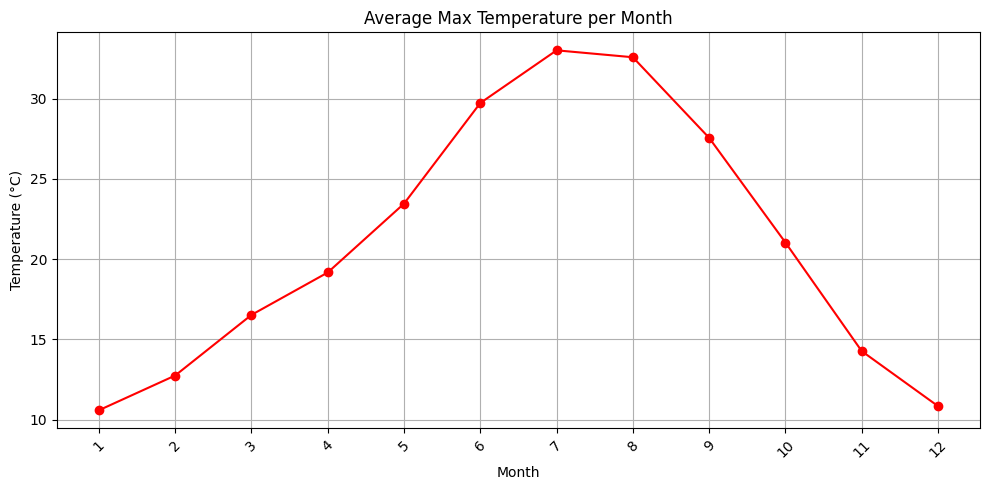

<Figure size 640x480 with 0 Axes>

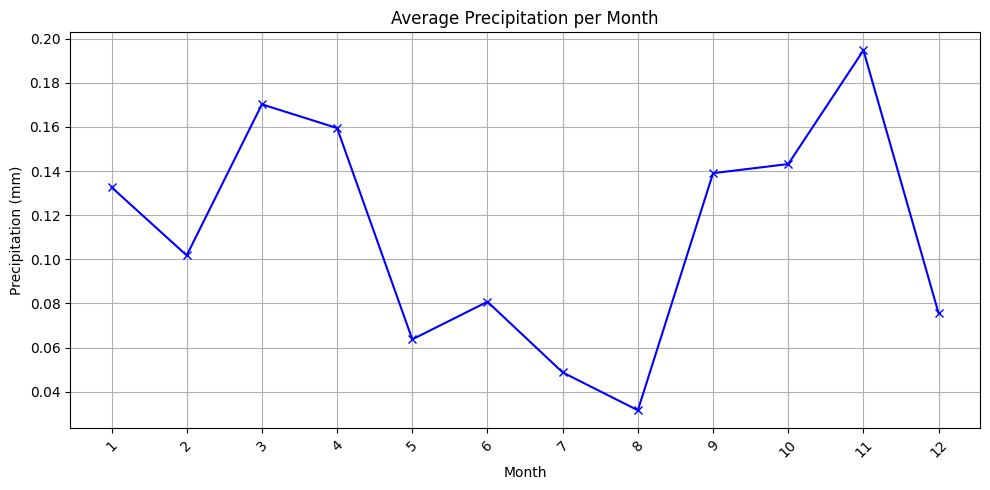

Visualizations saved as PNG and displayed.


<Figure size 640x480 with 0 Axes>

In [15]:
from collections import defaultdict

def visualize_data():
    dates = []
    max_temps = []
    precipitation = []

    try:
        with open('resources/weather.csv', mode='r') as file: 
            reader = csv.DictReader(file)
            
            for row in reader:
                if row['Max TemperatureC'] and row['Precipitationmm']:  
                    try:
                        max_temp = float(row['Max TemperatureC'])
                        precip = float(row['Precipitationmm'])
                        dates.append(row['CET'])
                        max_temps.append(max_temp)
                        precipitation.append(precip)
                    except ValueError:
                        continue  
                        
    except FileNotFoundError:
        print("The file weather.csv does not exist.")
        return
    except Exception as e:
        print(f"Error: {e}")
        return

    monthly_avg_temps = defaultdict(list)
    monthly_avg_precipitation = defaultdict(list)

    for i in range(len(dates)):
        date = dates[i]
        month = date.split('-')[1] 
        monthly_avg_temps[month].append(max_temps[i])
        monthly_avg_precipitation[month].append(precipitation[i])

    avg_monthly_temps = {month: sum(values) / len(values) for month, values in monthly_avg_temps.items()}
    avg_monthly_precipitation = {month: sum(values) / len(values) for month, values in monthly_avg_precipitation.items()}

    sorted_months = sorted(avg_monthly_temps.keys(), key=int)

    plt.figure(figsize=(10, 5))
    plt.plot(sorted_months, [avg_monthly_temps[month] for month in sorted_months], label='Avg Max Temperature (°C)', color='red', marker='o')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.title('Average Max Temperature per Month')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('avg_max_temperature.png')
    plt.show() 
    plt.clf() 

    plt.figure(figsize=(10, 5))
    plt.plot(sorted_months, [avg_monthly_precipitation[month] for month in sorted_months], label='Avg Precipitation (mm)', color='blue', marker='x')
    plt.xlabel('Month')
    plt.ylabel('Precipitation (mm)')
    plt.title('Average Precipitation per Month')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('avg_precipitation.png')  
    plt.show() 
    plt.clf()  

    print("Visualizations saved as PNG and displayed.")

visualize_data()